# Object Detection
 

# Step 1: Enable the GPU:
### Click Edit at the top of the screen. Then Notebook settings. In hardware accelerator, choose GPU and save settings.



# Step 2: Clone and build AlexeyAB's Darknet



In [ ]:
# clone the darknet repository
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15320, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 15320 (delta 0), reused 1 (delta 0), pack-reused 15318
Receiving objects: 100% (15320/15320), 13.73 MiB | 20.11 MiB/s, done.
Resolving deltas: 100% (10407/10407), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
# build darknet
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

# Step 3: Download the pre-trained YOLOv3 template


In [ ]:
# get weights from yolov3 pre-trained coconut dataset
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-10-24 19:41:00--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  21.1MB/s    in 12s     

2021-10-24 19:41:13 (19.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
# Auxiliary functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# file upload
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# download a file 
def download(path):
  from google.colab import files
  files.download(path)

# Step 4: Run as Detections with Darknet and YOLOv3!


 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

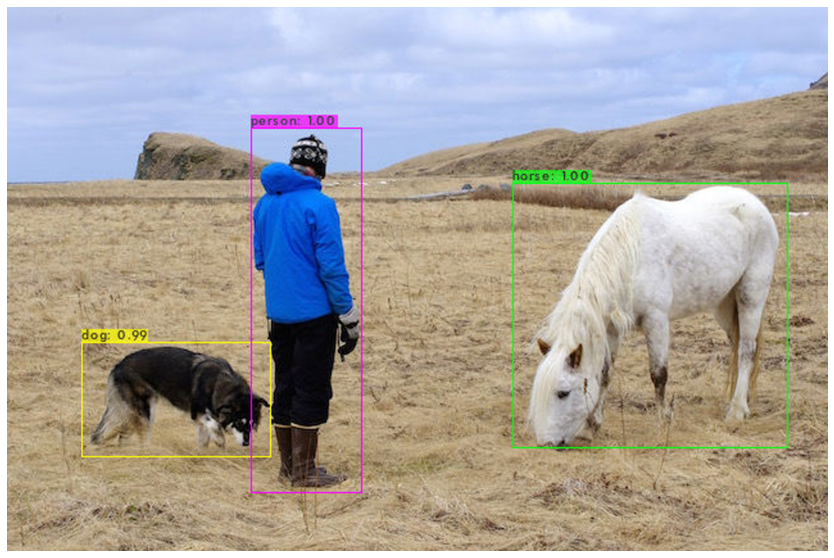

In [ ]:
# run darknet 
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg
imShow('predictions.jpg')

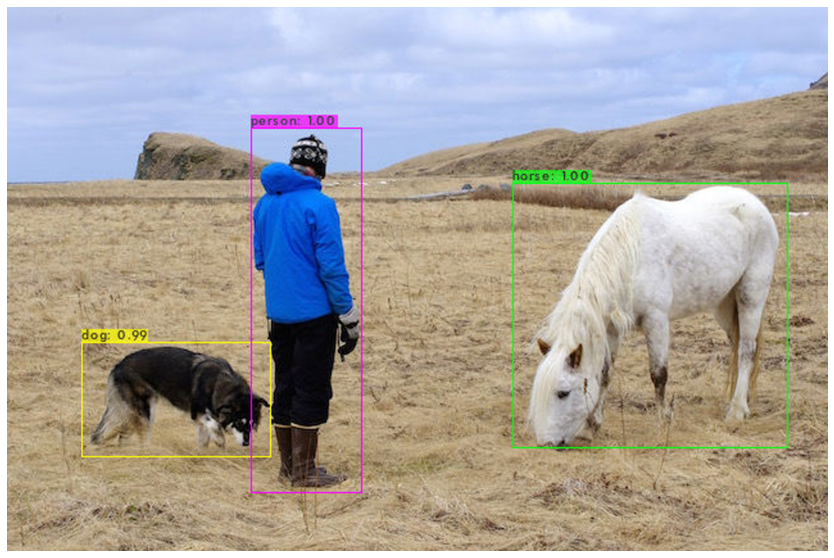

In [ ]:
# Show image through auxiliary function
imShow('predictions.jpg')

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

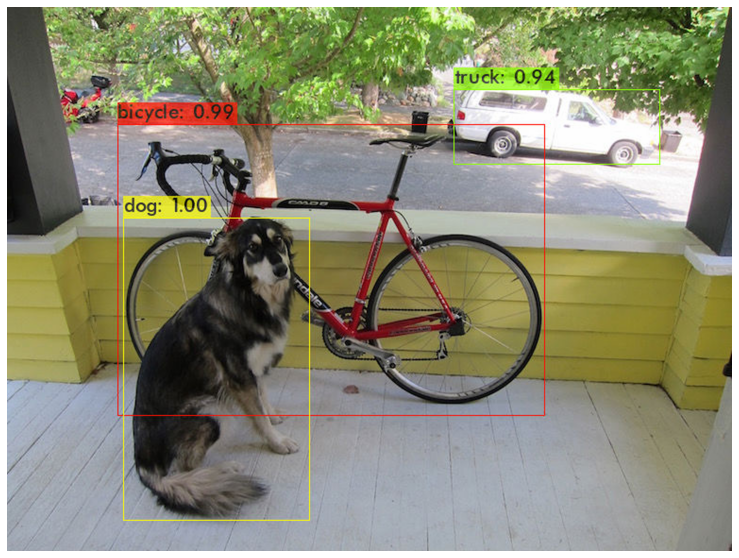

In [ ]:
# Show image through auxiliary function
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
imShow('predictions.jpg')

In [ ]:
# Show image through auxiliary function
# assert False

# Passo 5: Google Drive


In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [ ]:
# rename the path /content/gdrive/My\ Drive/ para /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 1008v3.png   bueiro3v3.png		   Object-Detection-API-master.zip
 1008v4.png   bueiro3v4.png		   resize14v3.png
 201v3.png    Buraco17Resizev3.png	   Resizeimg14_v4.png
 201v4.png    buraco17Resizev4.png	   Results
 42v3.png     buraco17v3.png		   resultVideo14v3.avi
 42v4.png     buraco17v4.png		   resultVideo14v4.avi
 654v3.png   'Colab Notebooks'		   resultVideo15v3.avi
 654v4.png   'Henrique das Virgens.docx'  'resultVideo15v4(1).avi'
 662v3.png   'https:  www.ins.txt'	  'Site sem título.gsite'
 662v4.png    images			  'Solicitação de Serviços.pdf'
 695v3.png   'Images FEVTOFEV.rar'	   tinta_v3.png
 695v4.png    img14Resultado.png	  'Trabalho (1).rar'
 70v3.png     img14_v4.png		   video15.avi
 70v4.png     img3v3.png		   yolov3
 715v3.png    img3v4.png
 715v4.png   'My Drive'


/content/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Sh

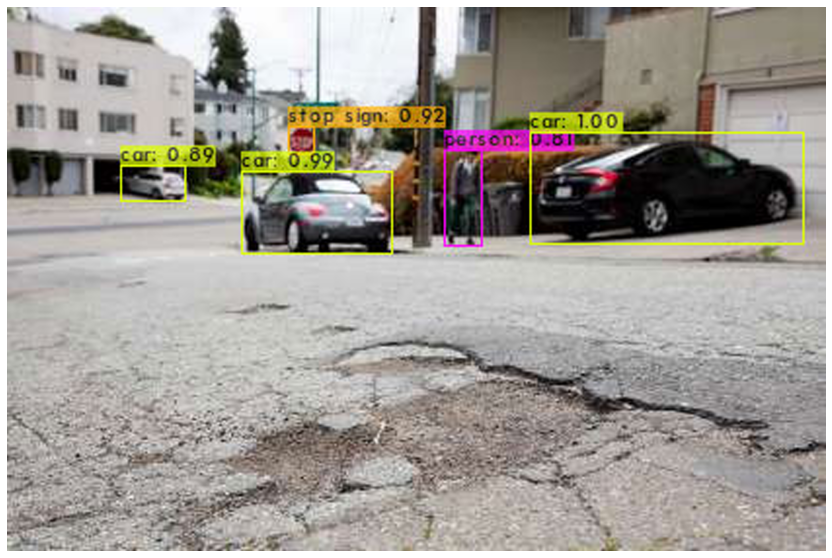

In [ ]:
# Run darknet with an image from google drive
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/images/7.jpg
imShow('predictions.jpg')

In [ ]:
# LOCAL MACHINE DOWNLOAD
# if you get an error first run then run it again and it should work
#download('predictions.jpg')

# Step 6: Train our cloud object detector

It is necessary at this stage:
*  our labeled dataset
*   the custom .cfg file
*   the obj.data and obj.names files 
*   the obj.data and obj.names files


# Step 7: Dataset mover to a cloud



In [ ]:
# Step 7: Move the dataset to a cloud
!ls /mydrive/yolov3

backup		   obj.data   obj.zip  tinta	  validation  yolov3_custom.cfg
generate_train.py  obj.names  test     train.txt  valid.txt   yolov4_custom.cfg


In [ ]:
# copy the .zip file to the cloud VM root directory
!cp /mydrive/yolov3/obj.zip ../

In [ ]:
# unzip the zip file
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
  inflating: data/obj/1.jpg          
  inflating: data/obj/1.txt          
  inflating: data/obj/10.jpg         
  inflating: data/obj/10.txt         
  inflating: data/obj/100.jpg        
  inflating: data/obj/100.txt        
  inflating: data/obj/1000.jpg       
  inflating: data/obj/1000.txt       
  inflating: data/obj/1001.jpg       
  inflating: data/obj/1001.txt       
  inflating: data/obj/1002.jpg       
  inflating: data/obj/1002.txt       
  inflating: data/obj/1003.jpg       
  inflating: data/obj/1003.txt       
  inflating: data/obj/1004.jpg       
  inflating: data/obj/1004.txt       
  inflating: data/obj/1005.jpg       
  inflating: data/obj/1005.txt       
  inflating: data/obj/1006.jpg       
  inflating: data/obj/1006.txt       
  inflating: data/obj/1007.jpg       
  inflating: data/obj/1007.txt       
  inflating: data/obj/1008.jpg       
  inflating: data/obj/1008.txt       
  inflating: data/obj/1009.jpg       
  inflating: data/obj/1009.tx

# Step 8: Configure files for training



In [ ]:
# download cfg para google drive e mudar o nome
# !cp cfg/yolov3.cfg /mydrive/darknet/yolov3_custom.cfg

In [ ]:
# download to a local machine
# download('cfg/yolov3.cfg')

In [ ]:
# upload the custom .cfg file back to the VM cloud via Google Drive yolov3
!cp /mydrive/yolov3/yolov3_custom.cfg ./cfg

# upload the custom .cfg file back to the VM cloud via Google Drive yolov3
#!cp /mydrive/yolov3/yolov4_custom.cfg ./cfg

# load the custom .cfg file back to the cloud VM via the local machine
#%cd cfg
upload()
#%cd .. 

Saving yolov3_custom.cfg to yolov3_custom.cfg
saved file yolov3_custom.cfg


In [ ]:
# upload the obj.names and obj.data file to the cloud VM via Google Drive
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

# upload the obj.names and obj.data file to the cloud VM via the local machine
#%cd data
#upload()
#%cd .. 

In [ ]:
# load the generate_train.py script to the cloud VM via Google Drive
!cp /mydrive/yolov3/generate_train.py ./

# load the generate_train.py script to the VM cloud via the local machine
#upload()


In [ ]:
# load training and test data
!cp /mydrive/yolov3/train.txt ./data
!cp /mydrive/yolov3/valid.txt  ./data

In [ ]:
!python generate_train.py

In [ ]:
# verify if train.txt is in darknet/data 
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  valid.txt
dog.jpg     horses.jpg	 obj			   person.jpg	     voc.names


# Step 9: Download convolutional layer weights


In [ ]:
# Yolov3
!wget http://pjreddie.com/media/files/darknet53.conv.74
#Yolov4
#!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

URL transformed to HTTPS due to an HSTS policy
--2021-10-14 18:50:14--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  55.0MB/s    in 2.8s    

2021-10-14 18:50:17 (55.0 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



# Step 10: Model training



In [ ]:
# train the yolov3 detector
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -map -dont_show
# Train yolov4
#!./darknet detector train data/obj.data cfg/yolov4_custom.cfg yolov4.conv.137 -map -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 210578, rewritten_bbox = 0.033717 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.684249), count: 5, class_loss = 1.148787, iou_loss = 0.549989, total_loss = 1.698776 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.611242), count: 8, class_loss = 1.951593, iou_loss = 1.089690, total_loss = 3.041283 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.543914), count: 5, class_loss = 1.438793, iou_loss = 2.260729, total_loss = 3.699522 
 total_bbox = 210596, rewritten_bbox = 0.033714 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.516977), count: 8, class_loss = 1.807469, iou_loss = 1.733513, total_loss = 3.540982 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.600796), count: 14, class_loss = 3.344218, iou_loss = 2.386920, total_loss = 5.731138 
v3 (m

In [ ]:
# Continuing training gives you where you were saved
#Yolov3
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -map -dont_show
# Yolov4
#!./darknet detector train data/obj.data cfg/yolov4_custom.cfg /mydrive/yolov3/backup/yolov4_custom_last.weights -map -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.763272), count: 9, class_loss = 0.935061, iou_loss = 0.387133, total_loss = 1.322194 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.733351), count: 7, class_loss = 0.668415, iou_loss = 0.435930, total_loss = 1.104346 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.570114), count: 1, class_loss = 0.250553, iou_loss = 0.149055, total_loss = 0.399608 
 total_bbox = 19622, rewritten_bbox = 0.040771 % 

 (next mAP calculation at 2300 iterations) 
 2277: 0.943539, 1.174173 avg loss, 0.001000 rate, 15.293965 seconds, 145728 images, 8.139013 hours left
Loaded: 0.000102 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.701967), count: 4, class_loss = 0.477883, iou_loss = 0.213999, total_loss = 0.691882 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cl

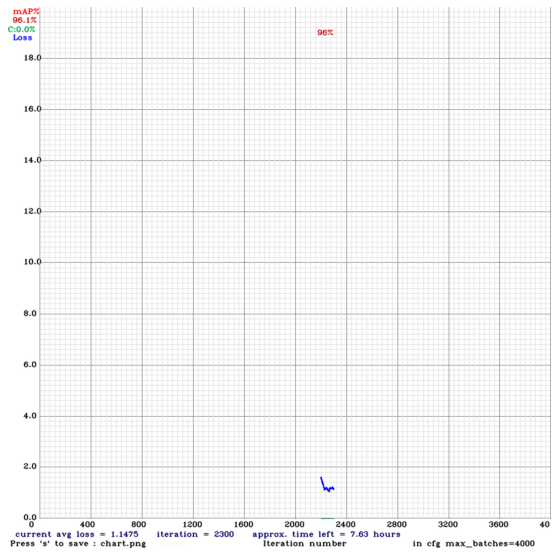

In [ ]:
# how the model fared throughout the training process. It shows a graph of your average loss versus iterations.
imShow('chart.png')

In [ ]:
# Yolov3 Metrics
!./darknet detector map data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_best.weights 
# Yolov4 Metrics
#!./darknet detector map data/obj.data cfg/yolov4_custom.cfg /mydrive/yolov3/backup/yolov4_custom_last.weights 

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,

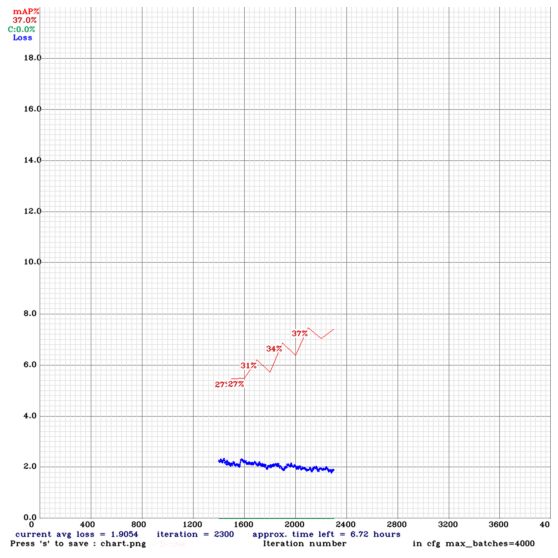

In [ ]:
# how the model fared throughout the training process. It shows a graph of your average loss versus iterations.
imShow('chart.png')

In [ ]:
#!./darknet detector map data/obj.data yolov3_custom.cfg backup/yolov3_custom_last.weights
!./darknet detector map data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_best.weights 

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,

# Step 11: Test the model


In [ ]:
# set our custom cfg to test mode
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=8/subdivisions=1/' yolov3_custom.cfg
%cd ..


/content/darknet/cfg
/content/darknet


 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,

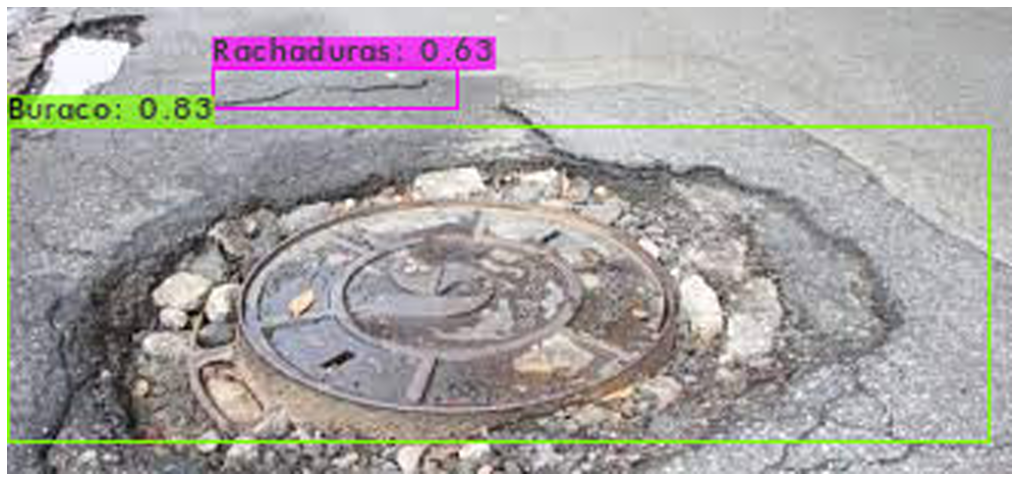

In [ ]:
# test with image
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights /mydrive/yolov3/test/bueiro3.jpeg -thresh 0.3
imShow('predictions.jpg')

In [ ]:
# test with video
!./darknet detector demo data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show /mydrive/yolov3/test/video14.mp4 -i 0 -out_filename resultVideo14v3.avi

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Laye

In [ ]:
#Teste com video
!./darknet detector demo data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show /mydrive/yolov3/test/video15.mp4 -i 0 -out_filename video3Result.avi

In [ ]:
#Teste com video
!./darknet detector demo data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show /mydrive/yolov3/test/video4.mp4 -i 0 -out_filename video4Result.avi

In [ ]:
#Teste com video
!./darknet detector demo data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show /mydrive/yolov3/test/videos5.mp4 -i 0 -out_filename video5Result.avi

In [ ]:
#Teste com video
!./darknet detector demo data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show /mydrive/yolov3/test/video6.mp4 -i 0 -out_filename video6Result.avi

In [ ]:
#Teste com video
!./darknet detector demo data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show /mydrive/yolov3/test/video7.mp4 -i 0 -out_filename video7Result.avi

In [ ]:
#Teste com video
!./darknet detector demo data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show /mydrive/yolov3/test/video8.mp4 -i 0 -out_filename video8Result.avi